## **Code : Data Visualization**
- Writer : Donghyeon Kim
- Update : 2022.11.16.
- 분석내용
    1. 태양광 사용 가구 - '수전전력량(kWh)' 4 X 3 형태

<hr>

## **Prior Settings**

In [1]:
# 라이브러리 설정
import os
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 사용자 함수 호출 #

# get_project_root : 파일의 상위-상위 경로 호출
# get_name_root : 모든 사용자 이름 호출
# get_name_use_final : 태양광 사용자 이름(최종) / 단독주택이라는 공통점 있음.
# get_name_not_final : 태양광 미사용자 이름(최종)
from pack_utils import get_project_root, get_name_root, get_name_use_final, get_name_not_final

# get_name_use_final_3kw : 태양광 사용자 이름(최종) 중 3kW 사용자
# get_name_not_final_detach : 태양광 미사용자 이름(최종) 중 단독주택
from pack_utils import get_name_use_final_3kw, get_name_not_final_detach

<hr>

## **User-Defined Function**
- user : 사용자명
- data_x : x 변수
- data_y : y 변수
- x_label : x 변수 label
- y_label : y 변수 label
- x_lim1, x_lim2 : x 변수 구간
- y_lim1, y_lim2 : y 변수 구간

### **1. Line Plot**
- 태양광 사용 가구(최종) 중 3kW / 공통점 : 단독주택
- 태양광 미사용 가구(최종) 중 단독주택

In [3]:
def lineplot_use_all(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print('Line Plot 시작')
    
    # All Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_final')
    file_name = os.path.join(folder_root, 'final_data_hour.xlsx')
    rawdata = pd.read_excel(file_name)

    # Data : '3kW' + 'NA'
    df_all = rawdata[rawdata['설비용량(kW)'].isin(['3kW', np.nan])]
    
    # 날짜 필터링 : 2021.05 ~ 2022.04
    date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3', '2022/4']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Line Plot between {y_label} and {x_label} for all household',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all[df_all.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_keei', 'plot')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'All_{y_label}_{x_label}_line.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Line Plot 종료')
    return

### **2. Scatter Plot**
- 태양광 사용 가구(최종) 중 3kW / 공통점 : 단독주택

In [10]:
def scatter_plot_use_all_label(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print('Scatter Plot 시작')
    
    # All Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_final')
    file_name = os.path.join(folder_root, 'final_data_hour.xlsx')
    rawdata = pd.read_excel(file_name)

    # Data : '3kW' + 'NA'
    df_all = rawdata[rawdata['설비용량(kW)'].isin(['3kW', np.nan])]
    
    # 날짜 필터링 : 2021.05 ~ 2022.04
    date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3', '2022/4']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Scatter Plot between {y_label} and {x_label} for all solar households',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all[df_all.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.15, hspace=0.25)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)           
            # axp.set(xlabel=None)
            # axp.set(ylabel=None)
            # axp.axes.xaxis.set_ticklabels([])
            # axp.axes.yaxis.set_ticklabels([])
            # handles, labels = axp.get_legend_handles_labels()
            # list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            # list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            # labels = [x[1] for x in list_labels_handles]
            # handles = [x[0] for x in list_labels_handles]
            # ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.15, hspace=0.25)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            # axp.set(xlabel=None)
            # plt.ylabel(y_label, fontsize=18)
            # axp.axes.xaxis.set_ticklabels([])
            # handles, labels = axp.get_legend_handles_labels()
            # list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            # list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            # labels = [x[1] for x in list_labels_handles]
            # handles = [x[0] for x in list_labels_handles]
            # ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.15, hspace=0.25)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            # axp.set(ylabel=None)
            # axp.axes.yaxis.set_ticklabels([])
            # handles, labels = axp.get_legend_handles_labels()
            # list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            # list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            # labels = [x[1] for x in list_labels_handles]
            # handles = [x[0] for x in list_labels_handles]
            # ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.15, hspace=0.25)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            # handles, labels = axp.get_legend_handles_labels()
            # list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            # list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            # labels = [x[1] for x in list_labels_handles]
            # handles = [x[0] for x in list_labels_handles]
            # ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_keei', 'plot')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'Use_{y_label}_{x_label}_Scatter_Label.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Scatter Plot 종료')
    return

<hr>

## **Graphs**

### **1. 수전 전력량**
- 태양광 사용 가구(최종) 중 3kW / 공통점 : 단독주택
- 태양광 미사용 가구(최종) 중 단독주택

Line Plot 시작
Line Plot 종료


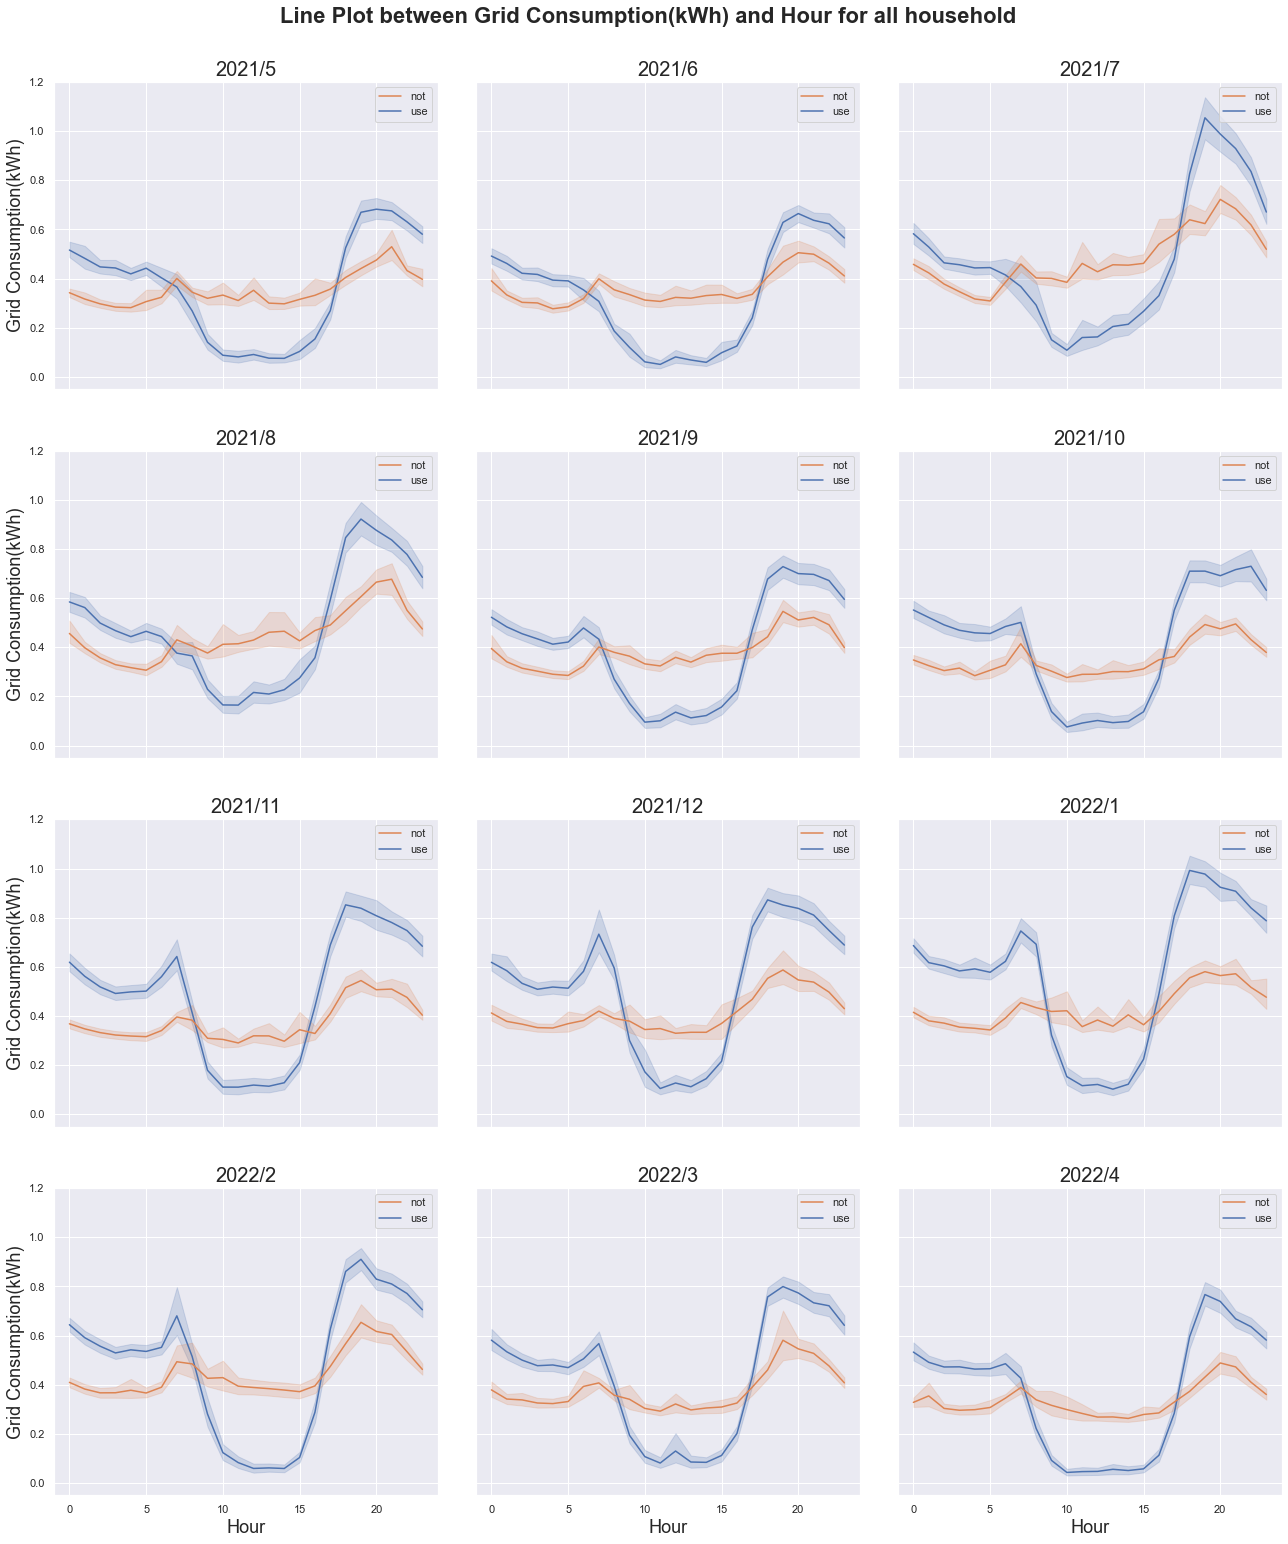

In [4]:
lineplot_use_all('시간', '수전전력량(kWh)', 'Hour', 'Grid Consumption(kWh)', -1.0, 24.0, -0.05, 1.2)

### **2. Scatter Plot**
- 태양광 사용 가구(최종) 중 3kW / 공통점 : 단독주택

Scatter Plot 시작
Scatter Plot 종료


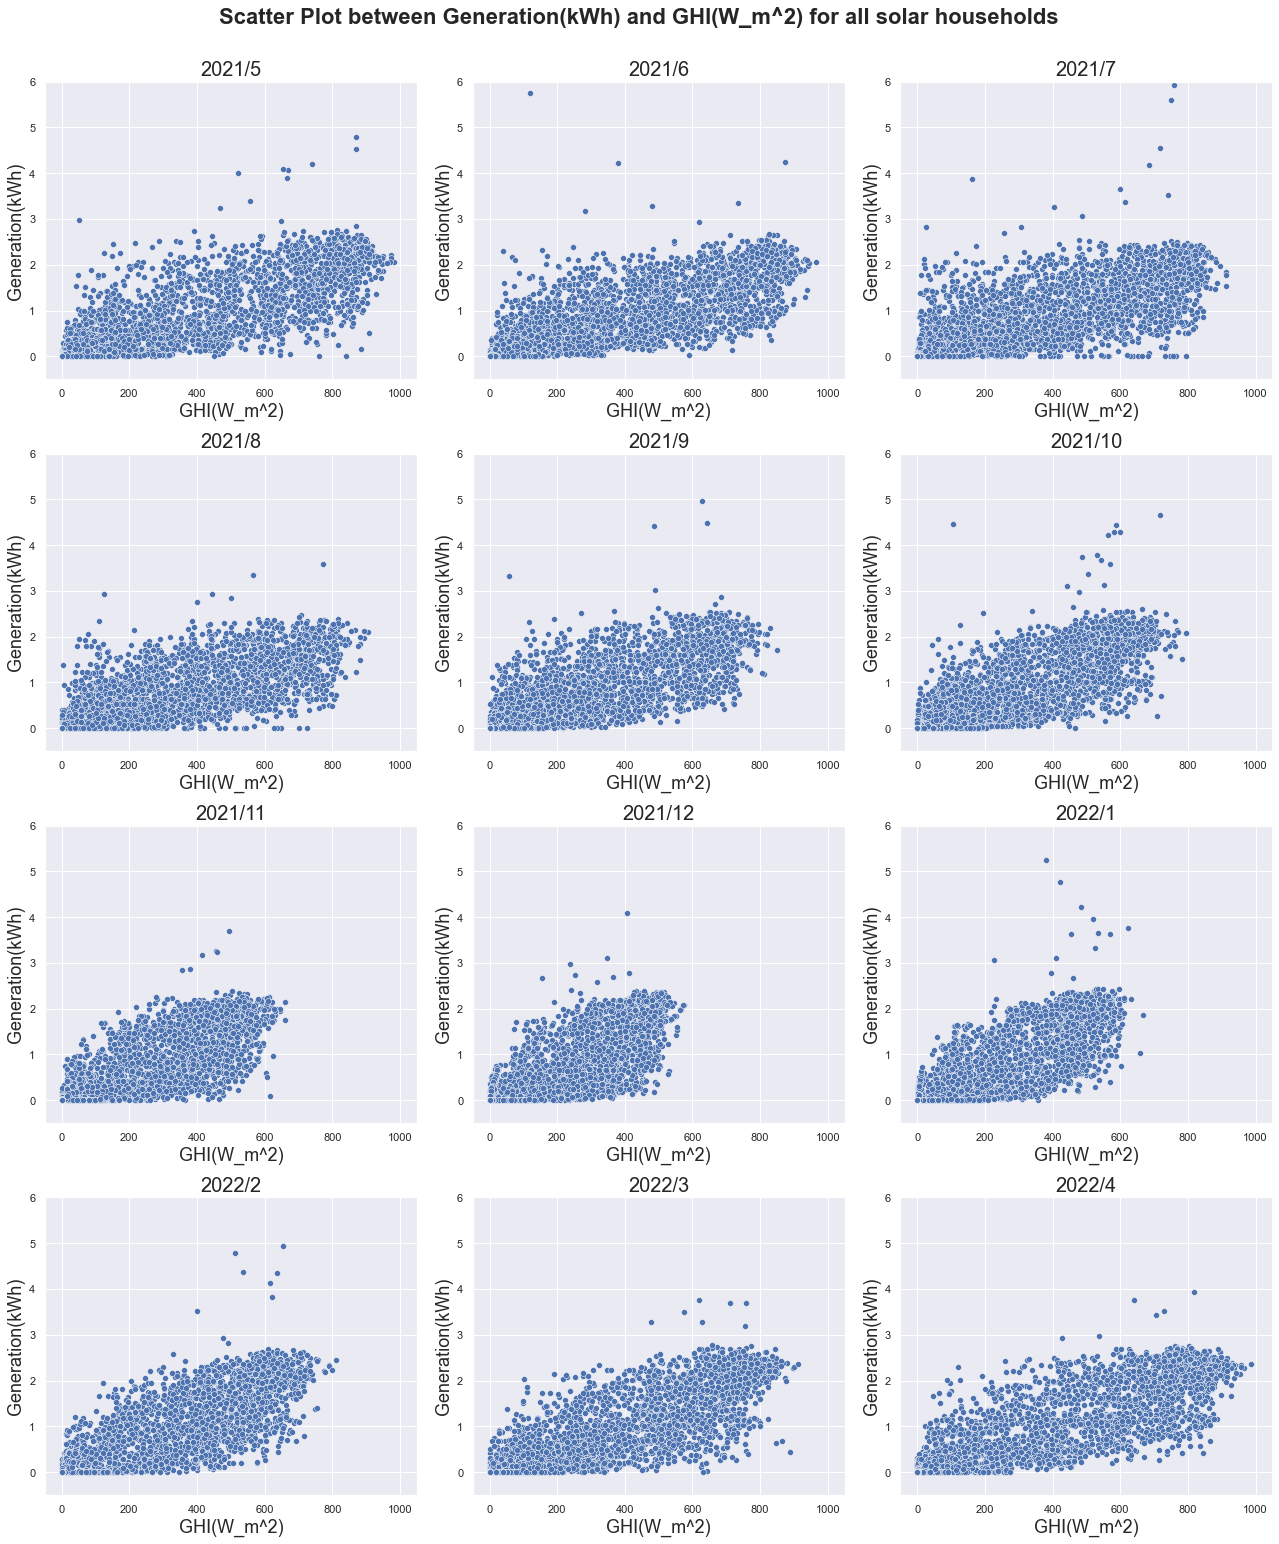

In [13]:
scatter_plot_use_all_label('ghi', '발전량(kWh)', 'GHI(W_m^2)', 'Generation(kWh)', -50.0, 1050.0, -0.5, 6.0)